<a href="https://colab.research.google.com/github/saurabh1227/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/PTBXLDATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install wfdb

     |████████████████████████████████| 137 kB 21.4 MB/s 


In [4]:
import pandas as pd
import numpy as np
import wfdb
import ast
from tqdm import tqdm
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_lr)]
    else:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_hr)]
    data = np.array([signal for signal, meta in data])
    return data


#Abstract
Electrocardiography (ECG) is a key diagnostic tool to assess the cardiac condition of a patient. Automatic ECG interpretation algorithms as diagnosis support systems promise large reliefs for the medical personnel - only on the basis of the number of ECGs that are routinely taken. However, the development of such algorithms requires large training datasets and clear benchmark procedures. In our opinion, both aspects are not covered satisfactorily by existing freely accessible ECG datasets.

The PTB-XL ECG dataset is a large dataset of 21837 clinical 12-lead ECGs from 18885 patients of 10 second length. The raw waveform data was annotated by up to two cardiologists, who assigned potentially multiple ECG statements to each record. The in total 71 different ECG statements conform to the SCP-ECG standard and cover diagnostic, form, and rhythm statements. To ensure comparability of machine learning algorithms trained on the dataset, we provide recommended splits into training and test sets. In combination with the extensive annotation, this turns the dataset into a rich resource for the training and the evaluation of automatic ECG interpretation algorithms. The dataset is complemented by extensive metadata on demographics, infarction characteristics, likelihoods for diagnostic ECG statements as well as annotated signal properties.

#Background

Background
The waveform data underlying the PTB-XL ECG dataset was collected with devices from Schiller AG over the course of nearly seven years between October 1989 and June 1996. With the acquisition of the original database from Schiller AG, the full usage rights were transferred to the PTB. The records were curated and converted into a structured database within a long-term project at the Physikalisch-Technische Bundesanstalt (PTB). The database was used in a number of publications, see e.g. [1,2], but the access remained restricted until now. The Institutional Ethics Committee approved the publication of the anonymous data in an open-access database (PTB-2020-1). During the public release process in 2019, the existing database was streamlined with particular regard to usability and accessibility for the machine learning community. Waveform and metadata were converted to open data formats that can easily processed by standard software.

#Methods
#Data Acquisition
Raw signal data was recorded and stored in a proprietary compressed format. For all signals, we provide the standard set of 12 leads (I, II, III, AVL, AVR, AVF, V1, …, V6) with reference electrodes on the right arm.
The corresponding general metadata (such as age, sex, weight and height) was collected in a database.
Each record was annotated with a report string (generated by cardiologist or automatic interpretation by ECG-device) which was converted into a standardized set of SCP-ECG statements (scp_codes). For most records also the heart’s axis (heart_axis) and infarction stadium (infarction_stadium1 and infarction_stadium2, if present) were extracted.
A large fraction of the records was validated by a second cardiologist.
All records were validated by a technical expert focusing mainly on signal characteristics.

#Data Preprocessing
ECGs and patients are identified by unique identifiers (ecg_id and patient_id). Personal information in the metadata, such as names of validating cardiologists, nurses and recording site (hospital etc.) of the recording was pseudonymized. The date of birth only as age at the time of the ECG recording, where ages of more than 89 years appear in the range of 300 years in compliance with HIPAA standards. Furthermore, all ECG recording dates were shifted by a random offset for each patient. The ECG statements used for annotating the records follow the SCP-ECG standard [3].

#Data Description
In general, the dataset is organized as follows:
ptbxl
├── ptbxl_database.csv
├── scp_statements.csv
├── records100
├── 00000
│   │   ├── 00001_lr.dat
│   │   ├── 00001_lr.hea
│   │   ├── ...
│   │   ├── 00999_lr.dat
│   │   └── 00999_lr.hea
│   ├── ...
│   └── 21000
│        ├── 21001_lr.dat
│        ├── 21001_lr.hea
│        ├── ...
│        ├── 21837_lr.dat
│        └── 21837_lr.hea
└── records500
   ├── 00000
   │     ├── 00001_hr.dat
   │     ├── 00001_hr.hea
   │     ├── ...
   │     ├── 00999_hr.dat
   │     └── 00999_hr.hea
   ├── ...
   └── 21000
          ├── 21001_hr.dat
          ├── 21001_hr.hea
          ├── ...
          ├── 21837_hr.dat
          └── 21837_hr.hea


The dataset comprises 21837 clinical 12-lead ECG records of 10 seconds length from 18885 patients, where 52% are male and 48% are female with ages covering the whole range from 0 to 95 years (median 62 and interquantile range of 22). The value of the dataset results from the comprehensive collection of many different co-occurring pathologies, but also from a large proportion of healthy control samples. The distribution of diagnosis is as follows, where we restrict for simplicity to diagnostic statements aggregated into superclasses (note: sum of statements exceeds the number of records because of potentially multiple labels per record):

The waveform files are stored in WaveForm DataBase (WFDB) format with 16 bit precision at a resolution of 1μV/LSB and a sampling frequency of 500Hz (records500/). For the user’s convenience we also release a downsampled versions of the waveform data at a sampling frequency of 100Hz (records100/).

All relevant metadata is stored in ptbxldatabase.csv with one row per record identified by ecgid. It contains 28 columns that can be categorized into:

Identifiers: Each record is identified by a unique ecg_id. The corresponding patient is encoded via patient_id. The paths to the original record (500 Hz) and a downsampled version of the record (100 Hz) are stored in filename_hr and filename_lr.
General Metadata: demographic and recording metadata such as age, sex, height, weight, nurse, site, device and recording_date
ECG statements: core components are scp_codes (SCP-ECG statements as a dictionary with entries of the form statement: likelihood, where likelihood is set to 0 if unknown) and report (report string). Additional fields are heart_axis, infarction_stadium1, infarction_stadium2, validated_by, second_opinion, initial_autogenerated_report and validated_by_human.
Signal Metadata: signal quality such as noise (static_noise and burst_noise), baseline drifts (baseline_drift) and other artifacts such as electrodes_problems. We also provide extra_beats for counting extra systoles and pacemaker for signal patterns indicating an active pacemaker.
Cross-validation Folds: recommended 10-fold train-test splits (strat_fold) obtained via stratified sampling while respecting patient assignments, i.e. all records of a particular patient were assigned to the same fold. Records in fold 9 and 10 underwent at least one human evaluation and are therefore of a particularly high label quality. We therefore propose to use folds 1-8 as training set, fold 9 as validation set and fold 10 as test set.
All information related to the used annotation scheme is stored in a dedicated scp_statements.csv that was enriched with mappings to other annotation standards such as AHA, aECGREFID, CDISC and DICOM. We provide additional side-information such as the category each statement can be assigned to (diagnostic, form and/or rhythm). For diagnostic statements, we also provide a proposed hierarchical organization into diagnostic_class and diagnostic_subclass.

Records | Superclass | Description
9528 | NORM | Normal ECG
5486 | MI | Myocardial Infarction
5250 | STTC | ST/T Change
4907 | CD | Conduction Disturbance
2655 | HYP | Hypertrophy

Usage Notes
In example_physionet.py we provide a minimal usage example that shows how to load waveform data (numpy-arrays X_train and X_test) and labels (y_train and y_test) making use of the proposed train-test split. For illustration, we use diagnostic subclass statements as labels based on the assignments in scp_statements.csv.

In [25]:
#path = '../content/sample_data/ptbxl_database.csv/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv('/content/sample_data/ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
#X = load_raw_data(Y, sampling_rate)

#print('data shpae:', X.shape)
Y[['scp_codes']]
Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,"{'NORM': 80.0, 'SBRAD': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",LAD,NaN,NaN,1.0,False,True,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",MID,Stadium II-III,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,"{'ISCAS': 50.0, 'SR': 0.0}",MID,NaN,NaN,1.0,True,True,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [14]:
Y.shape

(21837, 27)

#Load Data for Heart Beat Diagnostic

In [26]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv('/content/sample_data/scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]
print(agg_df.shape)
agg_df.head()

(44, 12)


,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [27]:
def aggregate_supclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))
    
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_supclass_diagnostic)
Y['diagnostic_superclass_len'] = Y['diagnostic_superclass'].apply(len)
Y.loc[Y.diagnostic_superclass_len > 1, 'diagnostic_superclass']

ecg_id
39       [STTC, MI]
45        [HYP, CD]
50         [MI, CD]
77         [MI, CD]
87       [STTC, CD]
            ...    
21815      [MI, CD]
21821    [NORM, CD]
21827    [STTC, MI]
21828    [STTC, MI]
21829    [NORM, CD]
Name: diagnostic_superclass, Length: 5158, dtype: object

#Number of Superclass per ECG record

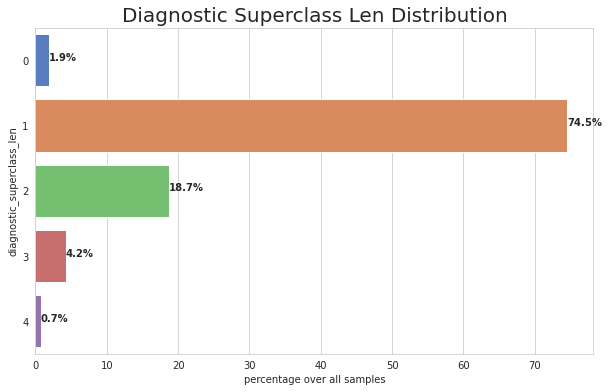

In [28]:
vc = Y['diagnostic_superclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Superclass Len Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_superclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

There could be up to 4 super class for the same ecg record!

#Meaning of Superclassses¶

#NORM: Normal ECG
#MI: Myocardial Infarction, a myocardial infarction (MI), commonly known as a heart attack, occurs when blood flow decreases or stops to a part of the heart, causing damage to the heart muscle Reference
#STTC: ST/T Change, ST and T wave changes may represent cardiac pathology or be a normal variant. Interpretation of the findings, therefore, depends on the clinical context and presence of similar findings on prior electrocardiograms.Reference
#CD: Conduction Disturbance. Your heart rhythm is the way your heart beats. Conduction is how electrical impulses travel through your heart, which causes it to beat. Some conduction disorders can cause arrhythmias, or irregular heartbeats. Reference
#HYP: Hypertrophy, Hypertrophic cardiomyopathy (HCM) is a disease in which the heart muscle becomes abnormally thick (hypertrophied). The thickened heart muscle can make it harder for the heart to pump blood. Reference

In [29]:
def aggregate_subclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))
    ret = ['sub_'+r for r in ret] # to distinguish between subclass and superclass columns
    return ret

# Apply diagnostic subclass
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_subclass_diagnostic)
Y['diagnostic_subclass_len'] = Y['diagnostic_subclass'].apply(len)
Y.loc[Y.diagnostic_subclass_len > 1, 'diagnostic_subclass']

ecg_id
26                    [sub_STTC, sub_NST_]
28                    [sub_STTC, sub_NST_]
39           [sub_STTC, sub_IMI, sub_NST_]
45       [sub_RVH, sub_IRBBB, sub_RAO/RAE]
50                     [sub_LMI, sub_IVCD]
                       ...                
21821                [sub_NORM, sub_IRBBB]
21827                  [sub_ISCA, sub_IMI]
21828                  [sub_ISCA, sub_IMI]
21829                [sub_NORM, sub_IRBBB]
21832            [sub_LAFB/LPFB, sub_IVCD]
Name: diagnostic_subclass, Length: 6191, dtype: object

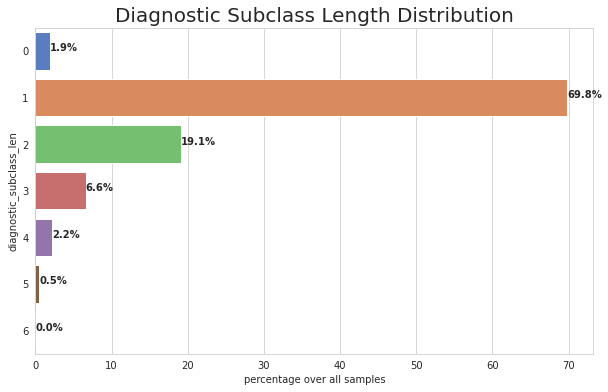

In [30]:
vc = Y['diagnostic_subclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Subclass Length Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_subclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

There could be up to 6 sub class for the same ecg record!

In [31]:
Y.columns.tolist()

['patient_id',
 'age',
 'sex',
 'height',
 'weight',
 'nurse',
 'site',
 'device',
 'recording_date',
 'report',
 'scp_codes',
 'heart_axis',
 'infarction_stadium1',
 'infarction_stadium2',
 'validated_by',
 'second_opinion',
 'initial_autogenerated_report',
 'validated_by_human',
 'baseline_drift',
 'static_noise',
 'burst_noise',
 'electrodes_problems',
 'extra_beats',
 'pacemaker',
 'strat_fold',
 'filename_lr',
 'filename_hr',
 'diagnostic_superclass',
 'diagnostic_superclass_len',
 'diagnostic_subclass',
 'diagnostic_subclass_len']

#Reformat Data for EDA¶

In [32]:
all_superclass = pd.Series(np.concatenate(Y['diagnostic_superclass'].values))
all_subclass = pd.Series(np.concatenate(Y['diagnostic_subclass'].values))
superclass_cols = all_superclass.unique()
subclass_cols = all_subclass.unique()
update_cols = np.concatenate([superclass_cols, subclass_cols]) # add meta data columns
meta_cols = ['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device',] # could add more columns as features

In [47]:
class ClassUpdate():
    def __init__(self, cols):
        self.cols = cols

    def __call__(self, row):
        for sc in row['diagnostic_superclass']:
            row[sc] = 1
        for sc in row['diagnostic_subclass']:
            row[sc] = 1
            
        return row

def get_data_by_folds(folds, x, y, update_cols, feature_cols):
    assert len(folds)  > 0, '# of provided folds should longer than 1'
    #print(y.strat_fold)
    filt = np.isin(y.strat_fold.values, folds)
    x_selected = x[filt]
    y_selected = y[filt]
    
    for sc in update_cols:
        y_selected[sc] = 0
        
    cls_updt = ClassUpdate(update_cols)
    
    y_selected = y_selected.apply(cls_updt, axis=1)
    
    return x_selected, y_selected[list(feature_cols)+list(update_cols)+['strat_fold']]

In [46]:
x_all, y_all = get_data_by_folds(np.arange(1, 11), update_cols,feature_cols )

NameError: ignored